In [37]:
from pandas import Series, DataFrame
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [6]:
employee = pd.read_csv('employee_churn_data.csv')

In [3]:
employee.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [84]:
def summary(data):
    print("*checking data structure*")
    print(data.shape)
    print("*checking variables*")
    print(data.info())
    print("*checking missing values*")
    print(data.isna().sum())
    print("*checking distribution*")
    print(data.describe([0.15,0.25,0.35,0.5,0.65,0.75,0.9]).T)
summary(employee)

*checking data structure*
(9540, 10)
*checking variables*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB
None
*checking missing values*
department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64
*checking

In [ ]:
num_list=['review','projects','tenure','satisfaction', 'avg_hrs_month']
cat_list=['left','salary','department','bonus', 'promoted']

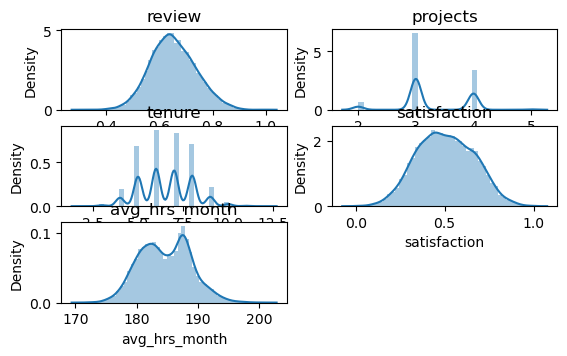

In [80]:
k=1
for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1

Our dataset consists of 9540 observations and 10 variables, which includes 5 numerical(promoted, review, projects, tenure, satisfaction, bonus, average working hours) and 5 categorical variables(department, bonus, promoted, salary, left).
According to the histogram and descriptive statistics, there are no missing values in our dataset.

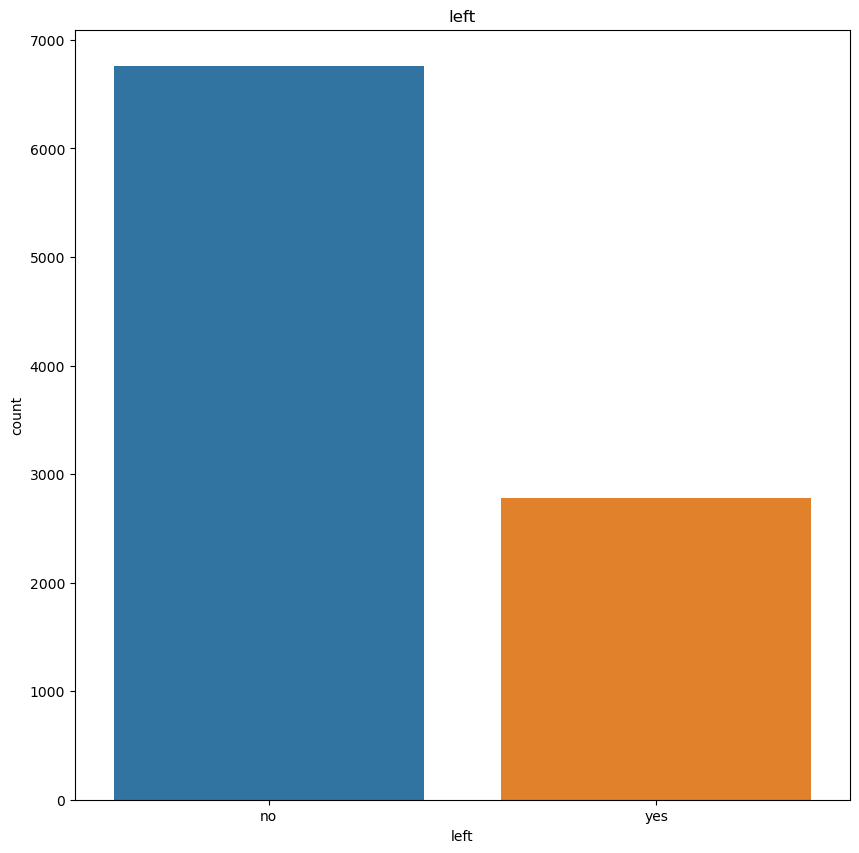

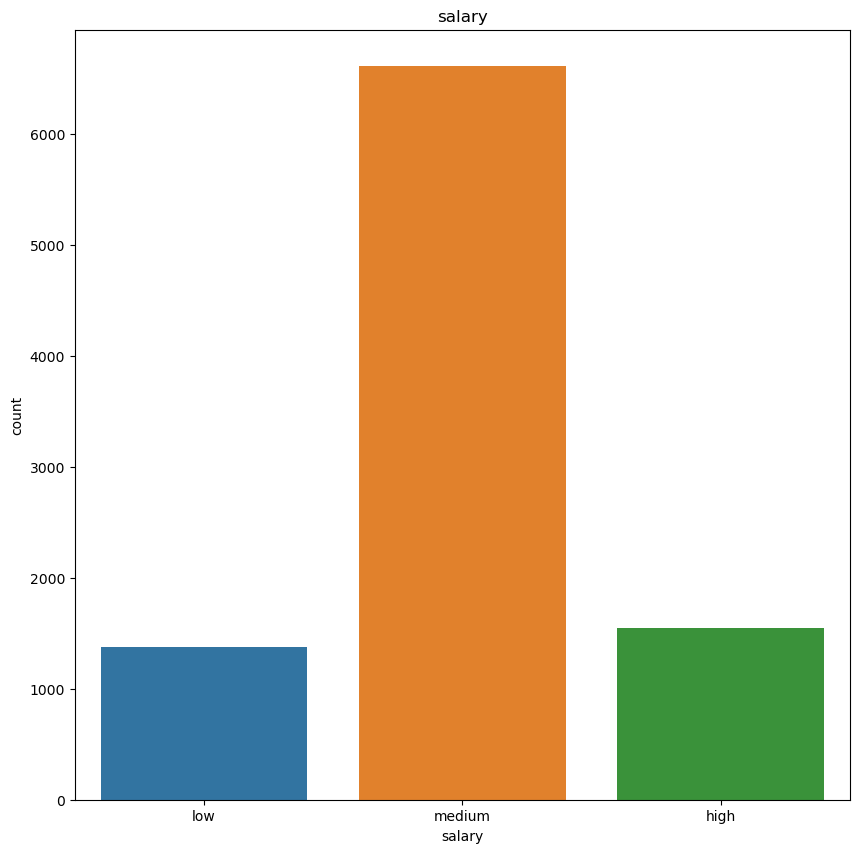

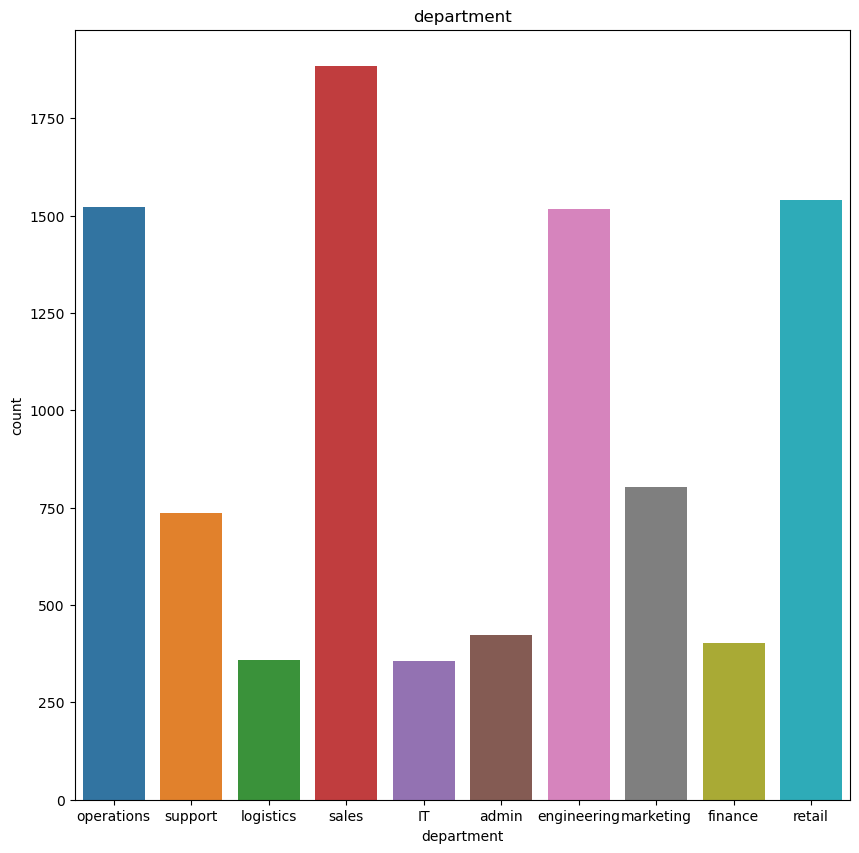

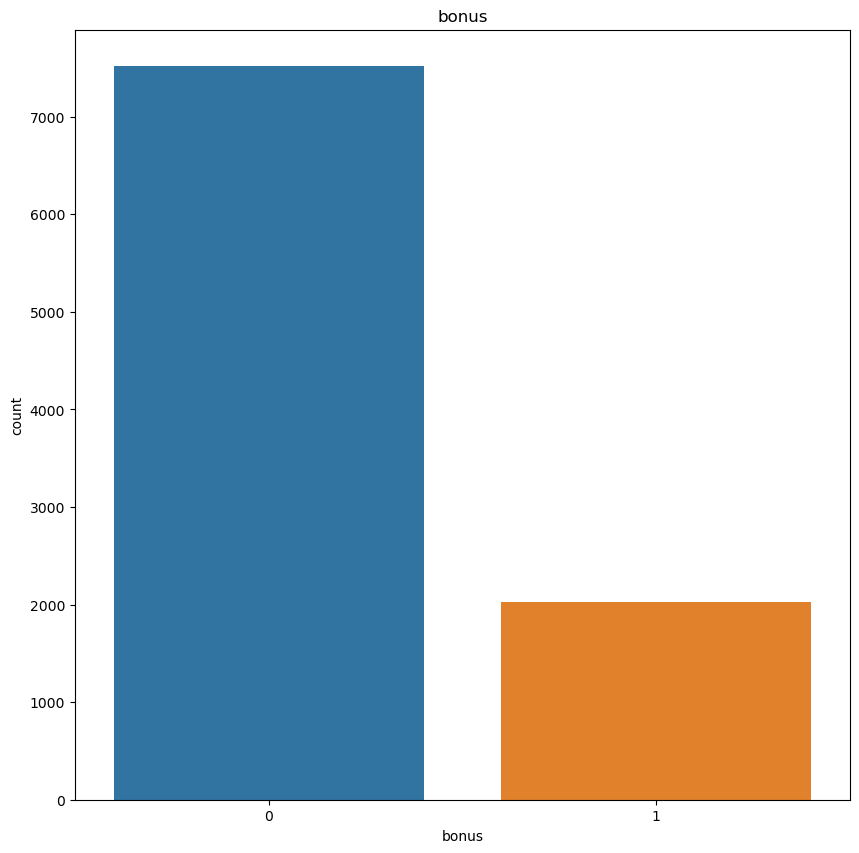

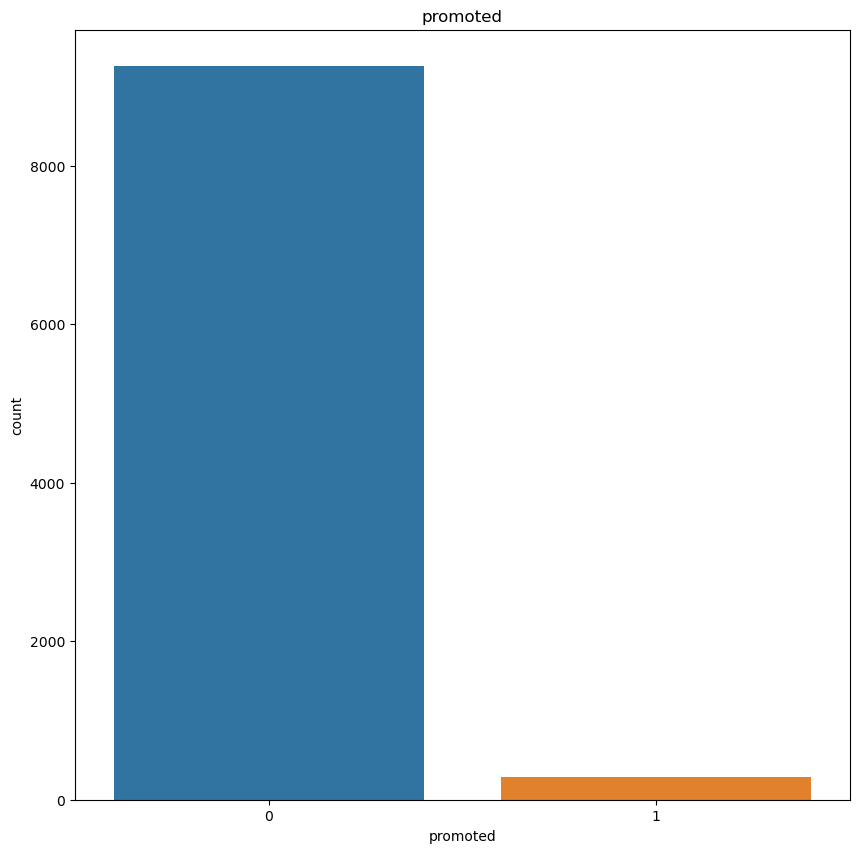

In [9]:
#check types of categorical variables
for i in cat_list:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i,data=employee.loc[:,cat_list])
    plt.title(i)

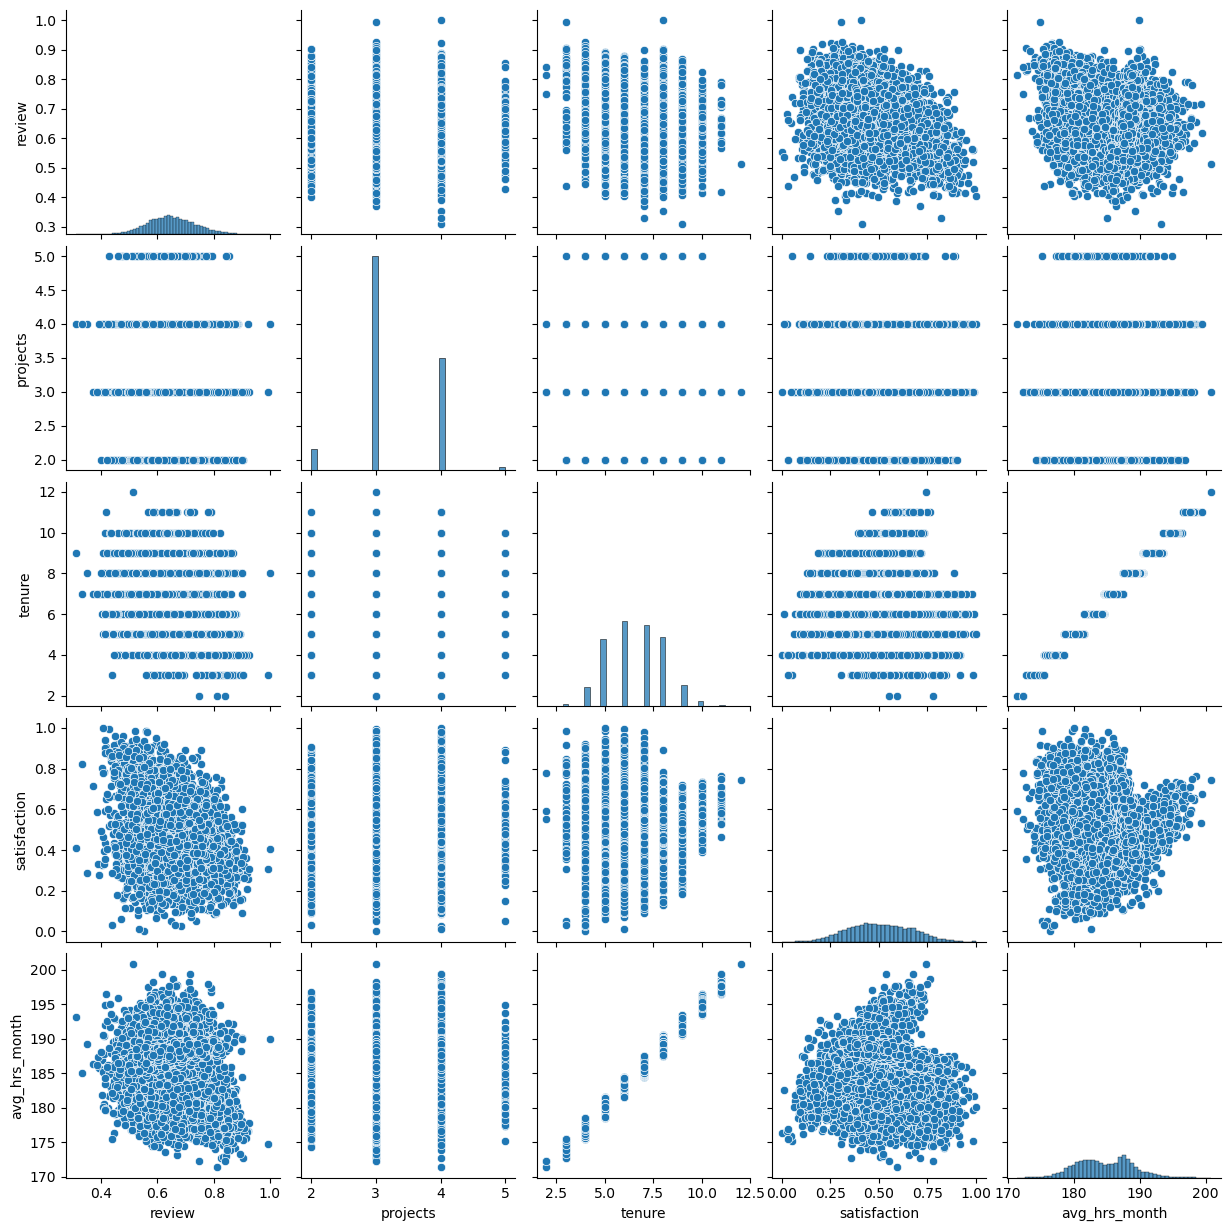

In [10]:
#check correlation of Numerical variable 
sns.pairplot(employee.loc[:,num_list])

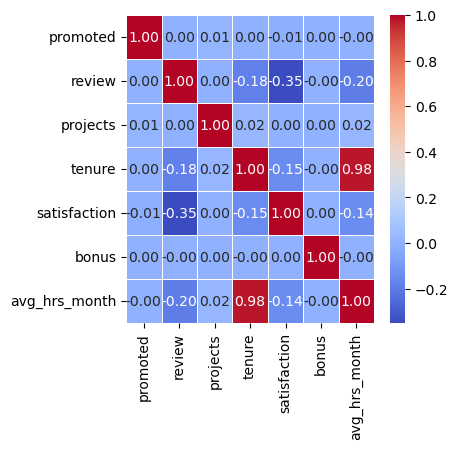

In [82]:
plt.figure(figsize=(4,4))
sns.heatmap(employee.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="coolwarm");

<Axes: xlabel='left', ylabel='satisfaction'>

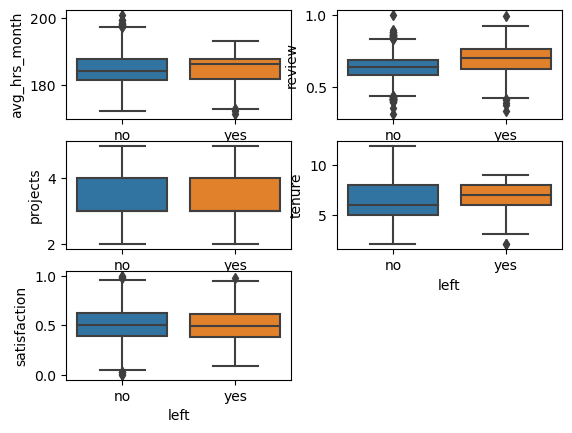

In [28]:
# check numerical variable vs. y
plt.subplot(3,2,1)
sns.boxplot(y='avg_hrs_month', x = 'left', data=employee)
plt.subplot(3,2,2)
sns.boxplot(y='review', x = 'left', data=employee)
plt.subplot(3,2,3)
sns.boxplot(y='projects', x = 'left', data=employee)
plt.subplot(3,2,4)
sns.boxplot(y='tenure', x = 'left', data=employee)
plt.subplot(3,2,5)
sns.boxplot(y='satisfaction', x = 'left', data=employee)

salary,high,low,medium
left,,,
no,0.71447,0.716872,0.704886
yes,0.28553,0.283128,0.295114


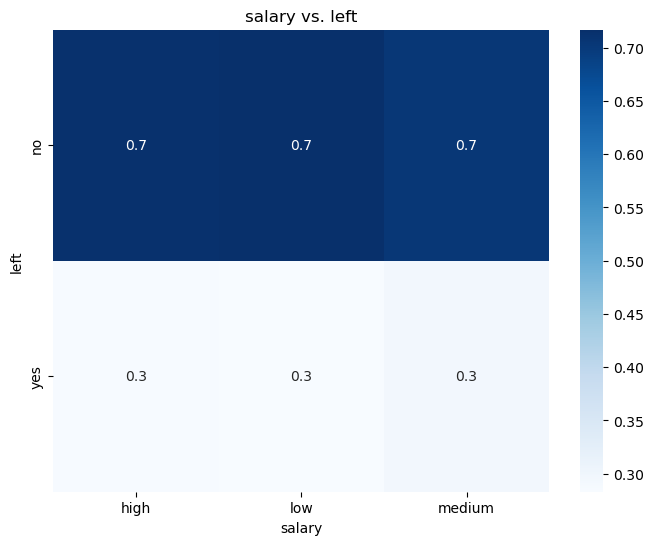

In [77]:
# check categorical variable vs. y
pivoted1 = employee.pivot_table(index='left',
                         columns='salary',
                         aggfunc='size', fill_value=0)

column_sum = pivoted1.sum(axis=0)
pivot_table_percentage1 = pivoted1.div(column_sum, axis=1)

pivot_table_percentage1

plt.figure(figsize=(8, 6))  # Set the plot size (optional)

# Create the heatmap
sns.heatmap(pivot_table_percentage1, annot=True, cmap='Blues', fmt=".1f")

# Add labels and title
plt.xlabel('salary')
plt.ylabel('left')
plt.title('salary vs. left')

pivot_table_percentage1

In [78]:
pivoted2 = employee.pivot_table(index='left',
                         columns='department',
                         aggfunc='size', fill_value=0)

column_sum = pivoted2.sum(axis=0)
pivot_table_percentage2 = pivoted2.div(column_sum, axis=1)

pivot_table_percentage2

department,IT,admin,engineering,finance,logistics,marketing,operations,retail,sales,support
left,,,,,,,,,,
no,0.691011,0.718676,0.711741,0.731343,0.691667,0.697007,0.713535,0.694354,0.714817,0.711565
yes,0.308989,0.281324,0.288259,0.268657,0.308333,0.302993,0.286465,0.305646,0.285183,0.288435


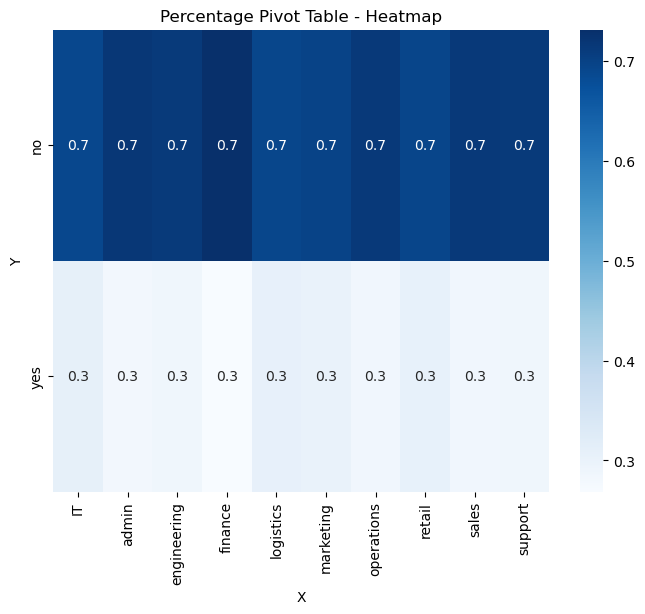

In [79]:
plt.figure(figsize=(8, 6))  # Set the plot size (optional)

# Create the heatmap
sns.heatmap(pivot_table_percentage2, annot=True, cmap='Blues', fmt=".1f")

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Percentage Pivot Table - Heatmap')

plt.show()

In [36]:
# create x and y
X=employee.drop("left",axis=1)
y=employee["left"]

In [38]:
#create train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)